In [25]:
%run Load_Data.ipynb import *
import neurokit2 as nk
import numpy as np
from lib.biosignals import *
from lib.acquisition import *
from lib.sensors import *

Using matplotlib backend: Qt5Agg


In [26]:
resp = np.array(CH3)
resp = resp.astype(float)
time=np.array(bsnb.generate_time(resp,fs))

In [27]:
len(CH3)

2249248

In [28]:
signals,info = nk.rsp_process(resp,fs)
signals["RSP_Clean"] = nk.rsp_clean(signals["RSP_Raw"],fs,method="biosppy")
info,peaks = nk.rsp_peaks(signals["RSP_Clean"],fs)
signals["RSP_Peaks"] = info["RSP_Peaks"]
signals["RSP_Troughs"] = info["RSP_Troughs"]

In [29]:
signals

,RSP_Raw,RSP_Clean,RSP_Amplitude,RSP_Rate,RSP_Phase,RSP_Phase_Completion,RSP_Peaks,RSP_Troughs
0,1.07094,-0.047878,2.530200,17.865872,NaN,0.0,0,0
1,1.06645,-0.047769,2.530200,17.865872,NaN,0.0,0,0
2,1.07098,-0.047659,2.530200,17.865872,NaN,0.0,0,0
3,1.06824,-0.047550,2.530200,17.865872,NaN,0.0,0,0
4,1.07135,-0.047440,2.530200,17.865872,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...
2249243,1.64095,0.000008,0.371869,16.958734,NaN,0.0,0,0
2249244,1.63687,0.000008,0.371869,16.958734,NaN,0.0,0,0
2249245,1.64447,0.000008,0.371869,16.958734,NaN,0.0,0,0
2249246,1.64557,0.000008,0.371869,16.958734,NaN,0.0,0,0


In [30]:
np.mean(signals["RSP_Rate"])

18.610779438783666

In [31]:
info,peak_signals = nk.rsp_peaks(signals["RSP_Clean"])
nk.rsp_rrv(signals["RSP_Rate"],peaks=peak_signals["RSP_Troughs"])

,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,RRV_MCVBB,RRV_VLF,...,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_1,RRV_DFA_2
0,1274.812248,4108.469725,1085.024544,1275.985443,0.264095,0.310289,3859.0,619.7268,0.160593,NaN,...,7.359435,NaN,NaN,902.257959,1241.163606,1.375619,1.250607,1.353714,0.790925,0.715396


Using matplotlib backend: Qt5Agg


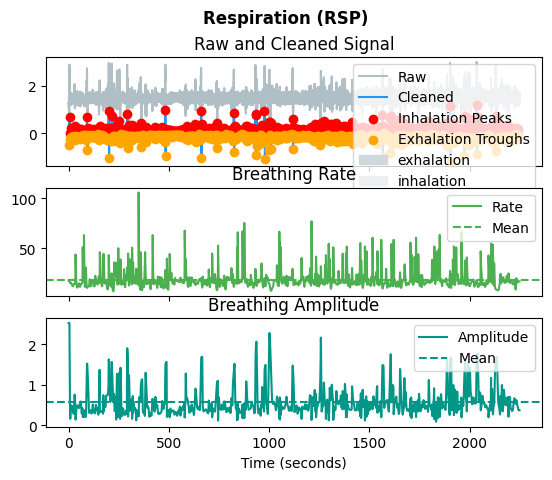

In [32]:
%matplotlib
nk.rsp_plot(signals,fs)